Epoch [100/30000], Loss: 0.0257
Epoch [200/30000], Loss: 0.0021
Epoch [300/30000], Loss: 0.0009
Epoch [400/30000], Loss: 0.0001
Epoch [500/30000], Loss: 0.0003
Epoch [600/30000], Loss: 0.0020
Epoch [700/30000], Loss: 0.0001
Epoch [800/30000], Loss: 0.0000
Epoch [900/30000], Loss: 0.0001
Epoch [1000/30000], Loss: 0.0000
Epoch [1100/30000], Loss: 0.0000
Epoch [1200/30000], Loss: 0.0000
Epoch [1300/30000], Loss: 0.0000
Epoch [1400/30000], Loss: 0.0000
Epoch [1500/30000], Loss: 0.0000
Epoch [1600/30000], Loss: 0.0000
Epoch [1700/30000], Loss: 0.0003
Epoch [1800/30000], Loss: 0.0000
Epoch [1900/30000], Loss: 0.0000
Epoch [2000/30000], Loss: 0.0000
Epoch [2100/30000], Loss: 0.0001
Epoch [2200/30000], Loss: 0.0000
Epoch [2300/30000], Loss: 0.0000
Epoch [2400/30000], Loss: 0.0023
Epoch [2500/30000], Loss: 0.0000
Epoch [2600/30000], Loss: 0.0000
Epoch [2700/30000], Loss: 0.0000
Epoch [2800/30000], Loss: 0.0001
Epoch [2900/30000], Loss: 0.0000
Epoch [3000/30000], Loss: 0.0000
Epoch [3100/30000],

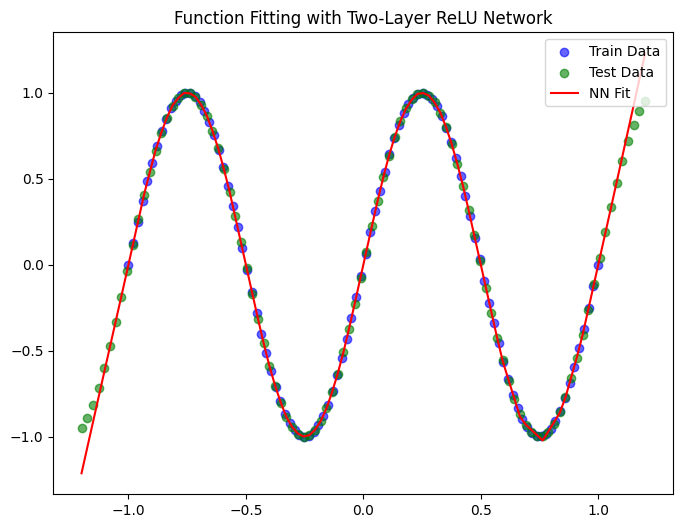

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def target_function(x):
    return np.sin(2 * np.pi * x)

# 生成训练和测试数据
np.random.seed(42)
x_train = np.linspace(-1, 1, 100).reshape(-1, 1)
y_train = target_function(x_train)

x_test = np.linspace(-1.2, 1.2, 100).reshape(-1, 1)
y_test = target_function(x_test)

# 转换为 PyTorch 张量
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# 定义两层ReLU神经网络
class ReLU_Network(nn.Module):
    def __init__(self):
        super(ReLU_Network, self).__init__()
        self.hidden = nn.Linear(1, 256)
        self.relu = nn.ReLU()
        self.output = nn.Linear(256, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# 初始化模型
model = ReLU_Network().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)



# 训练模型
epochs = 30000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 测试模型
model.eval()
with torch.no_grad():
    y_pred_test = model(x_test_tensor).cpu().numpy()

# 绘制拟合结果
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label="Train Data", color="blue", alpha=0.6)
plt.scatter(x_test, y_test, label="Test Data", color="green", alpha=0.6)
plt.plot(x_test, y_pred_test, label="NN Fit", color="red")
plt.legend()
plt.title("Function Fitting with Two-Layer ReLU Network")
plt.show()
